# New Section

#  1.Perkenalan

Anggota Team :
- Januwar By Khaqi (Pre Prosessing)
- Maya Setiana (Modelling)
- Rully Anggelia Sukarno Putri (Analysis)

## 1.1. Latar Belakang
Pada Project ini berisi penerapan Linier Regresi untuk menentukan harga yang dikeluarkan untuk menggunakan rideshare uber ataupun lyft. Data yang digunakan merupakan dataset Uber and Lyft Dataset Boston, MA yang mencatat pemesanan perjalanan taksi Uber dan Lyft di kota Boston selama November dan Desember 2018. Dataset ini terdiri dari 693071 baris dengan total kolom sebanyak 57 tentang data harga perjalanan menggunakan taksi Uber & Lyft berdasarkan waktu, penggandaan harga (surge multiplier), jarak, dan keadaan cuaca pada saat itu. Variabel dependen/responnya adalah price.
LinearRegression digunakan untuk mengetahui bagaimana pengaruh waktu, penggandaan harga, jarak, dan keadaan cuaca terhadap variasi harga dan juga mendapatkan model prediksi harga armada Uber/Lyft berdasarkan faktor-faktor yang diketahui.

## 1.2. Objektif
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression 
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.Import Library

pada bagian ini menggunakan import library untuk melakukan preproceesing, visualisasi dan modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


%matplotlib inline
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore')


# 3.Data Loading

## 3.1. Read Dataframe dari source CSV

memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe uber vs lyft.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSIB_KAMPUS_MERDEKA/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Terlihat bahwa terdapat 57 kolom dan 693071 baris

## 3.2. Menampilkan 5 data teratas

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dataset ini memiliki 57 atribut. Atribut dalam dataset ini antara lain :

1. id : unique identifier for each column
2. timestamp : unix timestamp
3. hour : hour of the day
4. day : day of the week
5. month : month in a year
6. datetime : date value
7. Timezone
8. source : initial source of the ride
9. destination : destination of the ride
10. cab_type : the type of cab
11. . . . dan lainnya

## 3.3. Menampilkan Informasi umum dari Data Frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

dari hasil di atas merupakan seluruh variabel yang terdapat dari dataset rideshare yang berjumlah sebanyak 57 variabel, dan memiliki 3 jenis tipe data yang terdiri dari object, float, dan integer

## 3.4. Melihat Ukuran Dataframe

In [ ]:
df.shape

(693071, 57)

dataframe yang digunakan memiliki total observasi sebanyak 693071 baris dan total variabel 57 kolom

## 3.5. Melihat Statistik Data Frame secara umum

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


hasil di atas menunjukkan statistik deskriptif dari seluruh variabel dataframe rideshare.

# 4.Explorasi Data

## 4.1. Melihat perbandingan persebaran dari penggunaan Uber dan Lyft

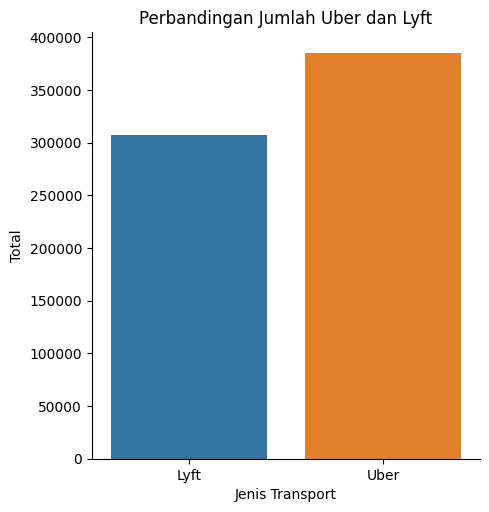

In [ ]:
jenis_transport = sns.catplot(x='cab_type',data=df,kind='count')
jenis_transport.set_axis_labels('Jenis Transport', 'Total')
jenis_transport.set(title='Perbandingan Jumlah Uber dan Lyft')
plt.show()

dari hasil di atas menunjukkan bahwa perbandingan jumlah data dengan type Uber dan Lyft dengan total perjalanan yang menggunakan kendaraan dari type uber lebih banyak dari total lyft.

## 4.2. Melihat persebaran penggunaan Ubar dan Lyft dalam 24 jam

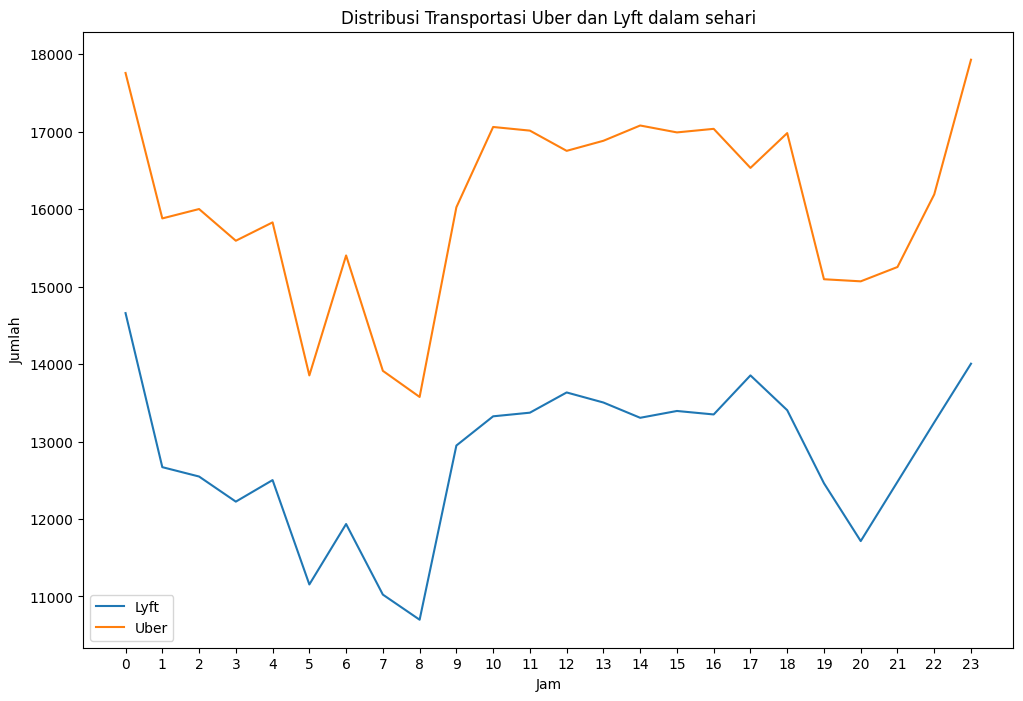

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Menghitung jumlah perjalanan setiap jam untuk Lyft dan Uber
lyft_count = df[df["cab_type"] == "Lyft"].groupby("hour").hour.count()
uber_count = df[df["cab_type"] == "Uber"].groupby("hour").hour.count()

# Plot data menggunakan variabel yang telah dibuat
ax.plot(lyft_count.index, lyft_count, label="Lyft")
ax.plot(uber_count.index, uber_count, label="Uber")

ax.legend()
ax.set(xlabel="Jam", ylabel="Jumlah", title="Distribusi Transportasi Uber dan Lyft dalam sehari")
plt.xticks(range(0, 24, 1))
plt.show()


dai grafik diatas terlihat bahwa Uber dan Lyft paling banyak digunakan pada tengah malam (00.00) dan paling sedikit digunakan pada pukul 8 pagi

## 4.3. Melihat korelasi dari price dan distance

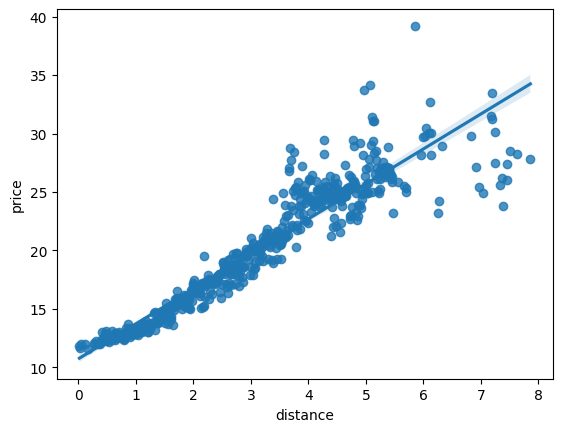

In [ ]:
distances = df.groupby('distance')['price'].mean()
sns.regplot(x=distances.index,y=distances,scatter=True)
plt.show()

Price dan distance berkorelasi positif, yang berarti semakin jauh jarak yang ditempuh semakin tinggi juga harga yang harus dibayar

## 4.4. Membuat Array 

In [ ]:
columnT = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

## 4.5. Membuat dataframe baru

In [ ]:
df_temp = df[columnT]
df_temp.head()


,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


## 4.6. Membuat Heatmap dan melihat korelasi dataframe temp

Membuat gambar (figure) dengan ukuran 14 x 10 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe (df_temp). Korelasi tersebut ditampilkan dalam bentuk nilai koefisien dan dideskripsikan dalam teks yang tertera di dalam kotak-kotak kecil di atas peta panas.


<Axes: >

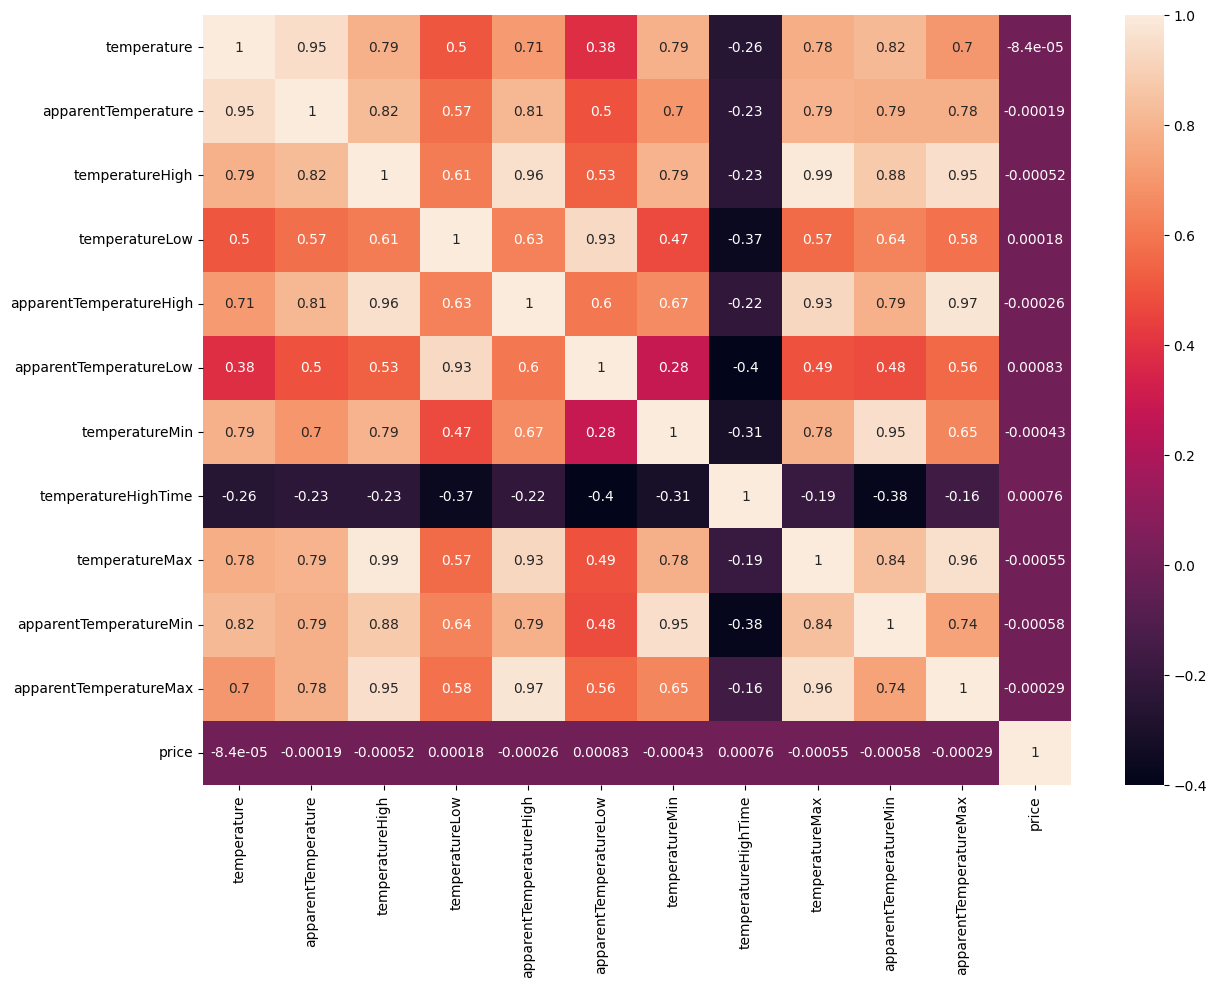

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_temp.corr(),annot=True)


Features temperature berkorelasi rendah dengan target (price) sehingga features temperature tidak akan digunakan.

## 4.7. Membuat dataframe baru untuk diamati korelasinya

Selanjutnya akan dicari korelasi features Climate yaitu, precipIntensity, precipProbability, humidity, windSpeed, windGust, visibility, dewPoint, pressure, windBearing, cloudCover, uvIndex, ozone, moonPhase, precipIntensityMax, terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [ ]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


## 4.8. Melihat korelasi dari climate dan price

membuat gambar dengan ukuran 14 x 10 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe (df_clim). Korelasi tersebut ditampilkan dalam bentuk nilai koefisien dan dideskripsikan dalam teks yang tertera di dalam kotak-kotak kecil di atas peta panas.






<Axes: >

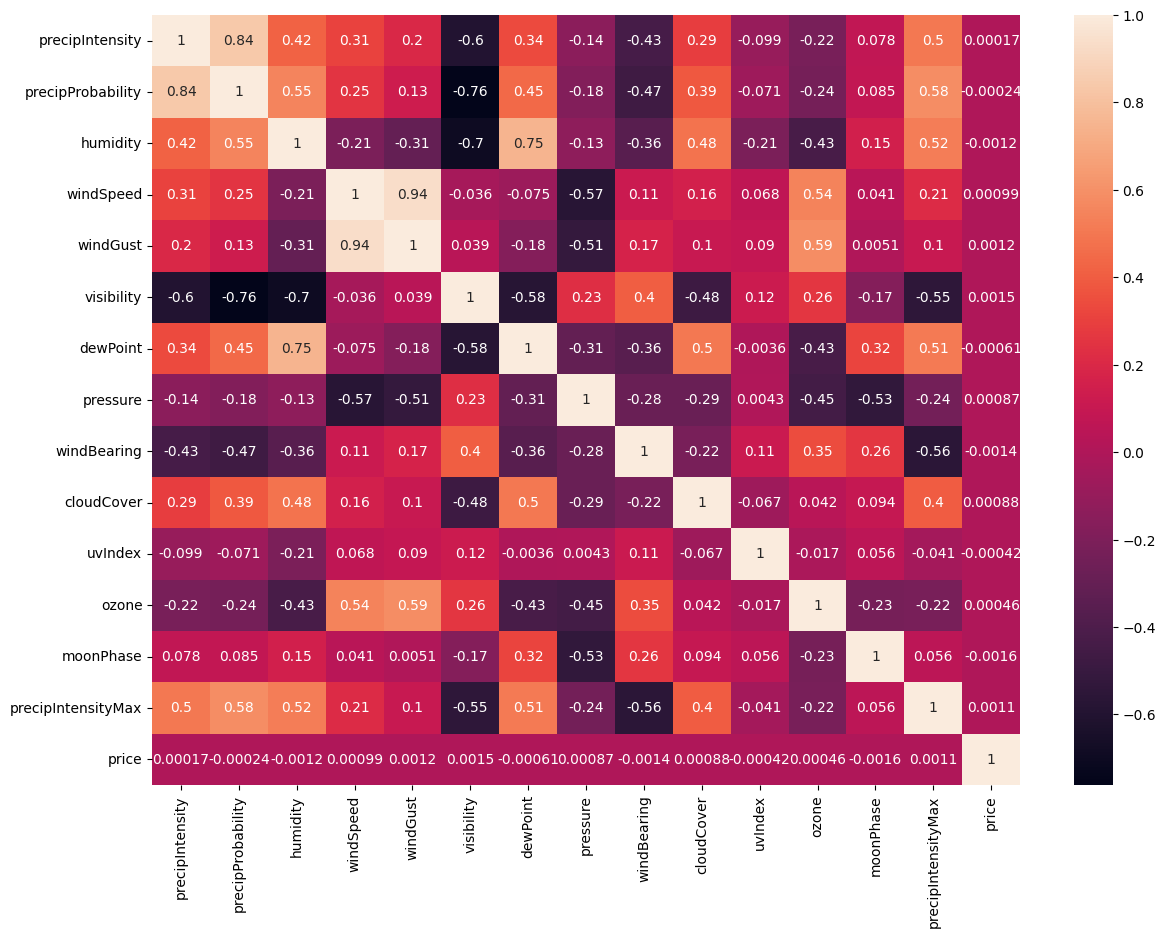

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_clim.corr(),annot=True)


Features climate berkorelasi lemah dengan target (price)

## 4.9. Membuat dataframe baru

kemudian dicari korelasi features Timestamp (hour, day, month) terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [ ]:
df_timestamp = df[['hour', 'day', 'month', 'price']]
df_timestamp.head()

,hour,day,month,price
0,9,16,12,5.0
1,2,27,11,11.0
2,1,28,11,7.0
3,4,30,11,26.0
4,3,29,11,9.0


## 4.10. Membuat heatmap dan melihat korelasi dari dataframe

membuat sebuah gambar dengan ukuran 12 x 8 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe (df_timestamp) yang berisi data dengan informasi waktu. Korelasi tersebut ditampilkan dalam bentuk nilai koefisien dan dideskripsikan dalam teks yang tertera di dalam kotak-kotak kecil di atas peta panas.

<Axes: >

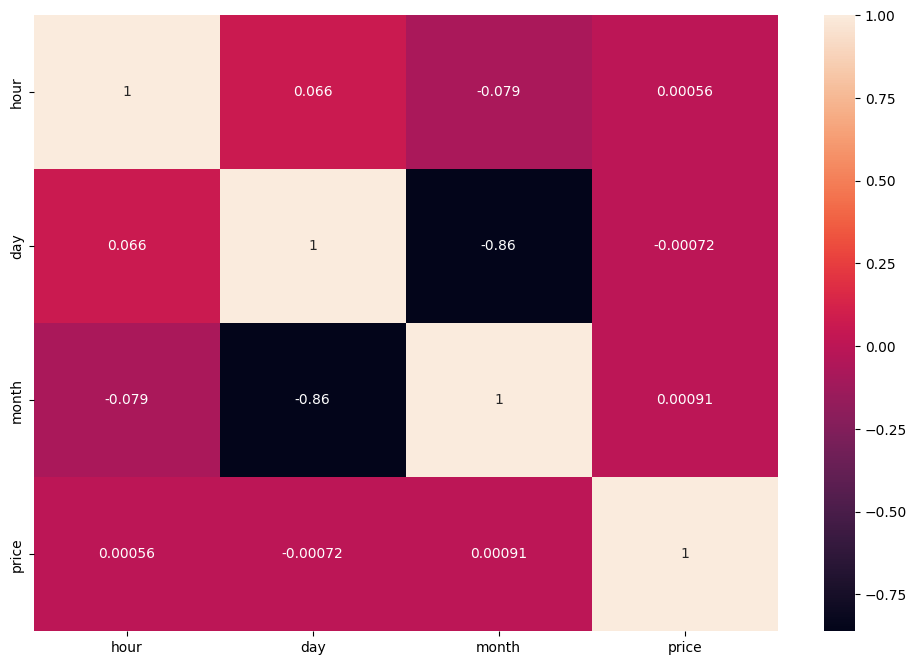

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_timestamp.corr(),annot=True)


Feature hour, day, dan month berkorelasi rendah dengan price

# 5.Data Cleaning

## 5.1. Menghapus Kolom yang dianggap memiliki korelasi yang lemah

In [ ]:
new_df = df.drop(['id', 'product_id', 'timestamp','hour','day','month', 'timezone', 'latitude', 'longitude',
                 'datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
                  'temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                  'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
                  'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
                  'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax'], axis = 1)

## 5.2. Melihat ukuran dataframe

In [ ]:
new_df.shape

(693071, 10)

didapatkan dataframe baru dengan ukuran 693071 dengan 9 features dan 1 target

## 5.3. Menampilkan ukuran dataframe

In [ ]:
new_df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000


# 6.Data Preprocessing

## 6.1. Mengecek missing value

In [ ]:
new_df.isnull().sum()

source                  0
destination             0
cab_type                0
name                    0
price               55095
distance                0
surge_multiplier        0
short_summary           0
icon                    0
visibility.1            0
dtype: int64

Terdapat missing value pada target, yaitu Price sebanyak 55095

## 6.2. Menampilkan dataframe

In [ ]:
new_df

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000
...,...,...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785
693067,West End,North End,Uber,UberX,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785
693068,West End,North End,Uber,Taxi,NaN,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785
693069,West End,North End,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy,partly-cloudy-night,9.785


Berdasarkan data diatas, dapat dilihat bahwa missing value terdapat pada semua atribut taxi. Untuk mengkonfirmasi kembali, tampilkan data yang memiliki name 'Taxi'

## 6.3. Menampilkan semua value name = Taxi

In [ ]:
new_df.loc[(new_df['name'] == 'Taxi')]

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
18,North End,West End,Uber,Taxi,NaN,1.11,1.0,Partly Cloudy,partly-cloudy-day,9.910
31,Beacon Hill,South Station,Uber,Taxi,NaN,2.48,1.0,Overcast,cloudy,7.790
40,North Station,Fenway,Uber,Taxi,NaN,2.94,1.0,Partly Cloudy,partly-cloudy-day,9.772
60,North End,West End,Uber,Taxi,NaN,1.16,1.0,Mostly Cloudy,partly-cloudy-day,9.956
69,North End,Beacon Hill,Uber,Taxi,NaN,2.67,1.0,Clear,clear-day,10.000
...,...,...,...,...,...,...,...,...,...,...
693025,South Station,Beacon Hill,Uber,Taxi,NaN,2.50,1.0,Mostly Cloudy,partly-cloudy-day,9.909
693047,Haymarket Square,Beacon Hill,Uber,Taxi,NaN,0.91,1.0,Mostly Cloudy,partly-cloudy-night,9.915
693049,North End,Beacon Hill,Uber,Taxi,NaN,1.79,1.0,Mostly Cloudy,partly-cloudy-night,9.915
693060,Theatre District,Haymarket Square,Uber,Taxi,NaN,1.61,1.0,Overcast,cloudy,9.698


Berdasarkan data diatas, dapat dilihat bahwa missing value terdapat pada semua atribut taxi. Untuk mengkonfirmasi kembali, tampilkan data yang memiliki nameTaxi

## 6.4. Menghapus semua value dari name = taxi

In [ ]:
new_df.drop(df.index[df['name'] == 'Taxi'], inplace=True)


Dikarenakan value price dari Taxi semuanya merupakan missing value maka, data tersebut dihapus dari dataframe karena dianggap tidak memberikan dampak yang besar terhadap hasil prediksi. Adapun jumlah data yang dihapus hanya sekitar 7,94 % dari total data keseluruhan

## 6.5. Melihat ukuran dataframe

In [ ]:
new_df.shape

(637976, 10)

Terlihat bahwa ukuran data frame setelah dilakukan penghapusan pada missing value price pada name taxi adalah 637976 data

## 6.6. Mengecek Missing Value

In [ ]:
new_df.isnull().sum().sum()

0

Missing value sudah tidak ada.

## 6.7. Membuat dataframe baru

membuat sebuah list yang berisi nama kolom-kolom yang akan disimpan pada dataframe baru dengan nama "df_cat". List tersebut mencakup kolom-kolom yang dianggap relevan untuk analisis, seperti informasi sumber dan tujuan perjalanan, jenis kendaraan, dan informasi harga. DataFrame baru tersebut dihasilkan dengan memilih kolom-kolom yang terdapat pada list "new_cat" dari dataframe "new_df" menggunakan method ".loc[]". Setelah itu, menggunakan method ".head()" untuk menampilkan lima baris teratas dari dataframe "df_cat". Dengan demikian, dataframe baru ini akan berisi hanya kolom-kolom yang diperlukan untuk analisis selanjutnya.

In [ ]:
new_cat = ['source',
 'destination',
 'cab_type',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Partly Cloudy,partly-cloudy-night,9.0


## 6.8. Mengimport Library dan melakukan Encoding pada type object agar menjadi numeric

mengimport library "preprocessing" dari scikit-learn dan membuat sebuah objek encoder dengan menggunakan method "LabelEncoder()" yang diberi nama "le". Kemudian, dibuat dataframe baru dengan nama "df_cat_encode" yang merupakan salinan dari dataframe "df_cat". Selanjutnya, dilakukan proses encoding pada kolom-kolom bertipe data objek (yang dapat dienkripsi) pada dataframe "df_cat_encode" menggunakan loop "for". Pada setiap iterasinya, encoder "le" akan diterapkan pada setiap kolom bertipe data objek untuk mengubah nilai-nilai dalam kolom tersebut menjadi bilangan integer. Hasilnya, dataframe "df_cat_encode" akan memiliki kolom-kolom yang diencode dan dapat digunakan untuk melakukan analisis yang memerlukan data dengan tipe data numerik.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode = df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

## 6.9. Menampilkan Data Frame

Berikut dibawah ini merupakan hasil encode multiple yang selanjutnya akan dicari korelasinya.

In [ ]:
df_cat_encode

,source,destination,cab_type,short_summary,icon,price
0,5,7,0,4,5,5.0
1,5,7,0,8,6,11.0
2,5,7,0,0,1,7.0
3,5,7,0,0,1,26.0
4,5,7,0,6,5,9.0
...,...,...,...,...,...,...
693065,11,6,1,6,5,9.5
693066,11,6,1,6,5,13.0
693067,11,6,1,6,5,9.5
693069,11,6,1,6,5,27.0


## 6.10. Membuat Heatmap dan melihat korelasi pada dataframe

membuat sebuah gambar dengan ukuran 12 x 12 inci menggunakan library matplotlib.pyplot (plt). Di dalam gambar tersebut, ditampilkan sebuah peta panas (heatmap) yang merepresentasikan korelasi antara variabel-variabel dalam dataframe yang telah diencode sebelumnya, yaitu "df_cat_encode". Korelasi tersebut ditampilkan dalam bentuk nilai koefisien dan dideskripsikan dalam teks yang tertera di dalam kotak-kotak kecil di atas peta panas. Dengan menggunakan peta panas ini, dapat diketahui bagaimana korelasi antara variabel-variabel pada dataframe "df_cat_encode".

<Axes: >

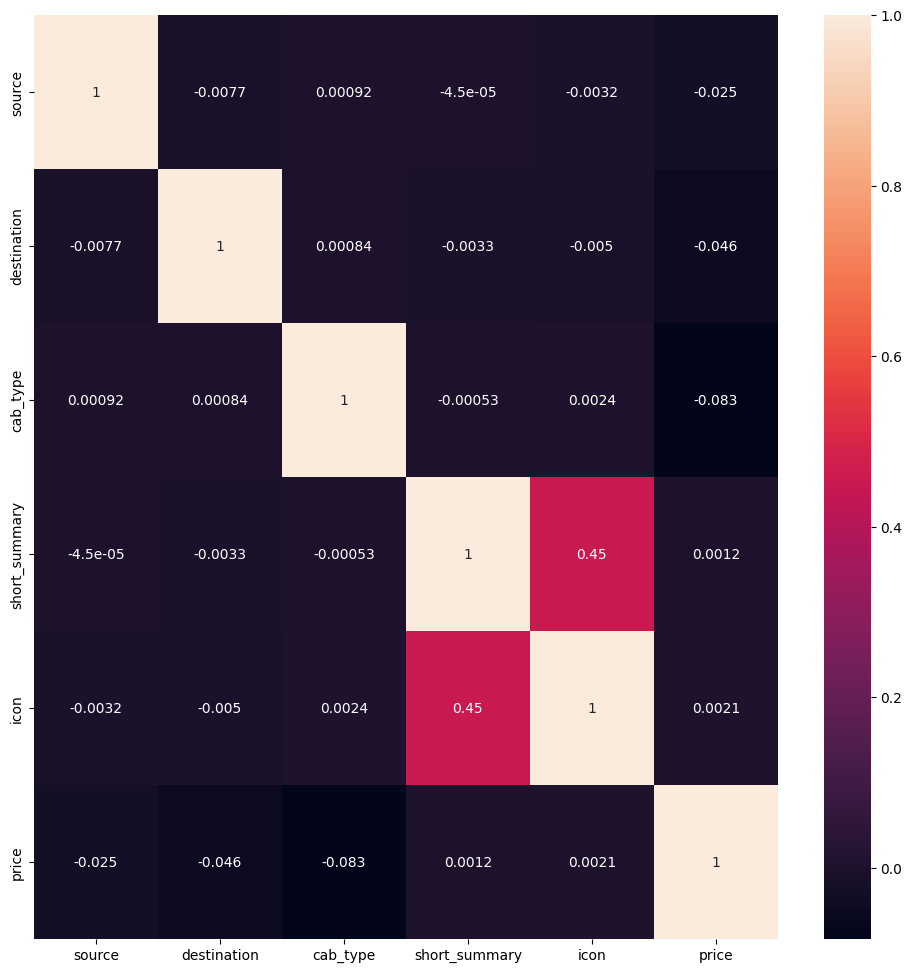

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cat_encode.corr(),annot=True)

Kita hanya bisa melihat fitur nama yang memiliki korelasi relatif kuat. Fitur source,destination, dan cab_type memiliki korelasi yang relatif lemah, tetapi saya akan memilih fitur cab_type karena memiliki korelasi yang lebih kuat daripada dua fitur lainnya. Kolom sisa akan dihapus.

## 6.11. Menghapus kolom yang dianggap tidak memiliki korelasi yang tinggi

membuat dataframe baru yang disebut "new_df", setelah beberapa kolom dihapus dengan menggunakan method ".drop()". Kolom-kolom yang dihapus meliputi kolom sumber (source), tujuan (destination), dan icon, yang dianggap tidak diperlukan dalam analisis selanjutnya. DataFrame baru tersebut kemudian ditampilkan lima baris teratas dari dataframe baru tersebut dengan menggunakan method ".head()". Dengan demikian, dataframe baru "new_df" tersebut hanya terdiri dari kolom-kolom yang dianggap relevan untuk analisis selanjutnya.

In [ ]:
new_df = new_df.drop(['source','destination','icon'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier,short_summary,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,10.000
1,Lyft,Lux,11.0,0.44,1.0,Rain,4.786
2,Lyft,Lyft,7.0,0.44,1.0,Clear,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,10.000


In [ ]:
df_name = pd.get_dummies(new_df['name'])

menggunakan method "get_dummies()" dari library pandas untuk membuat kolom-kolom baru dalam dataframe baru "new_df" yang merepresentasikan setiap nilai unik pada kolom "name". Dalam hal ini, kolom "name" dianggap sebagai kolom kategorikal yang dapat di-encode menjadi kolom-kolom biner. Setiap nilai unik pada kolom "name" akan diencode menjadi kolom biner sendiri-sendiri. Hasilnya adalah dataframe baru "df_name" yang memiliki kolom-kolom biner untuk setiap nilai unik pada kolom "name".

## 6.12. Menghapus kolom dan menggabungkan kolom

membuat sebuah dataframe baru "new_df" setelah dilakukan penggabungan beberapa dataframe yang ada. Pertama, dilakukan penghapusan kolom "name", "short_summary", dan "cab_type" dari dataframe "new_df" menggunakan method ".drop()". Kemudian, kolom "cab_type" dari dataframe "df_cat_encode" dan semua kolom biner yang dihasilkan dari kolom "name" ditambahkan ke dalam dataframe baru "new_df" menggunakan method ".concat()". Dengan demikian, dataframe baru "new_df" tersebut terdiri dari beberapa kolom numerik dan kolom-kolom biner yang merepresentasikan nilai unik dari kolom "name" dan kolom "cab_type".






In [ ]:
new_df = pd.concat([new_df.drop(['name', 'short_summary', 'cab_type'], axis=1), df_cat_encode[['cab_type']], df_name], axis=1)

## 6.13. Melihat ukuran dari Dataframe

In [ ]:
new_df.shape

(637976, 17)

## 6.14. Menampilkan 5 data teratas dari dataframe

In [ ]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


## 6.15. Menampilkan info umum dari dataframe

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   visibility.1      637976 non-null  float64
 4   cab_type          637976 non-null  int64  
 5   Black             637976 non-null  uint8  
 6   Black SUV         637976 non-null  uint8  
 7   Lux               637976 non-null  uint8  
 8   Lux Black         637976 non-null  uint8  
 9   Lux Black XL      637976 non-null  uint8  
 10  Lyft              637976 non-null  uint8  
 11  Lyft XL           637976 non-null  uint8  
 12  Shared            637976 non-null  uint8  
 13  UberPool          637976 non-null  uint8  
 14  UberX             637976 non-null  uint8  
 15  UberXL            637976 non-null  uint8  
 16  WAV               63

Jadi, hasil dari cleaning data dan preprocessing data adalah terdapat 693071 baris dan 17 kolom yang dianggap paling relevan.

kami menggunakan kolom price, distance, surge-multiplier, visibility.1, cab_type, dan name (Black, Black SUV, dll) karena variabel-variabel tersebut dianggap berpengaruh terhadap harga suatu tipe taksi pada perusahaan yang dijadikan objek penelitian.

# 7.Pendefinisian Model / Modelling


## 7.1. Mengimpor library

berdasarkan hasil preprocessing yang dilakukan, akan dilakukan pembuatan model linear regression menggunakan library sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## 7.2. Memisahkan dataframe menjadi x dan y

membuat dua variabel baru "x" dan "y", di mana variabel "x" merupakan dataframe "new_df" setelah kolom "price" dihapus menggunakan method ".drop()", sedangkan variabel "y" hanya berisi kolom "price" dari dataframe "new_df". Dengan demikian, variabel "x" berisi semua fitur atau atribut kecuali "price", sedangkan variabel "y" hanya berisi nilai target "price" yang akan diprediksi dalam analisis selanjutnya. Variabel "x" dan "y" tersebut akan digunakan dalam proses pemodelan atau analisis selanjutnya.






In [ ]:
x = new_df.drop('price', axis =1)
y = new_df['price']

# 8.Latih Model

membuat model linear regression yang akan digunakan untuk melakukan prediksi terhadap nilai target "price" berdasarkan fitur-fitur atau atribut yang ada pada variabel "x". Pertama-tama, objek model linear regression dibuat menggunakan class "LinearRegression()". Selanjutnya, objek model tersebut di-fit atau di-train menggunakan method ".fit()" dengan data fitur "x" dan nilai target "y" sebagai argumennya. Model linear regression yang sudah di-fit tersebut akan digunakan untuk melakukan prediksi pada data baru dalam tahap analisis selanjutnya.






In [ ]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

In [ ]:
r2_base = model.score(x, y)
print('coefficient of determination:', r2_base)

coefficient of determination: 0.9272719856185735


Menghitung nilai koefisien determinasi (R-squared) pada model linear regression yang sudah di-fit. Nilai R-squared tersebut menunjukkan seberapa besar variasi dari nilai target "price" yang dapat dijelaskan oleh fitur-fitur atau atribut yang ada pada variabel "x". Nilai R-squared sebesar 0.93 atau 93%, artinya sekitar 93% variasi dari nilai target "price" dapat dijelaskan oleh fitur-fitur atau atribut yang ada pada variabel "x". Semakin tinggi nilai R-squared, semakin baik model yang dibangun dalam menjelaskan variasi dari data yang ada.

## 8.1 Melihat nilai Intercept

In [ ]:
print('intercept:', model.intercept_)

intercept: -7.79344662599123


Menghitung nilai intercept pada model linear regression yang sudah di-fit. Nilai intercept tersebut merupakan nilai titik potong garis regresi pada sumbu Y (nilai target "price") ketika semua fitur atau atribut pada variabel "x" bernilai nol. Dalam hal ini, nilai intercept sebesar -7.79 menunjukkan bahwa jika seluruh fitur atau atribut pada variabel "x" bernilai nol, maka nilai target "price" akan memiliki nilai -7.79 pada sumbu Y.

## 8.2 Melihat nilai Slope

Menghitung nilai slope pada model linear regression yang sudah di-fit. Nilai slope tersebut menunjukkan seberapa besar pengaruh dari masing-masing fitur atau atribut pada variabel "x" terhadap nilai target "price". Dalam hal ini, nilai slope untuk setiap fitur atau atribut menunjukkan seberapa besar perubahan yang terjadi pada nilai target "price" jika fitur atau atribut tersebut ditingkatkan sebesar satu satuan. Misalnya, jika fitur pertama ditingkatkan satu satuan, maka nilai target "price" akan meningkat sebesar 2.79 pada sumbu Y.

In [ ]:
print('slope:', model.coef_)

slope: [ 2.79465436e+00  1.83335049e+01  2.05286646e-04 -7.46356552e-01
  4.60414497e+00  1.43671816e+01  4.36042877e-01  5.72726805e+00
  1.49888881e+01 -7.74023866e+00 -2.04175598e+00 -1.06238478e+01
 -7.16713431e+00 -6.15454325e+00 -2.41441109e-01 -6.15456450e+00]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

membagi dataset menjadi dua subset yaitu training set dan testing set menggunakan train_test_split dari sklearn.model_selection. test_size=0.2 berarti 20% dari data akan digunakan sebagai testing set dan random_state=42 berarti data akan dibagi secara acak, tetapi dengan nilai seed tertentu (yaitu 42), sehingga hasil pembagian data dapat direproduksi kembali. X_train, X_test, y_train, y_test adalah variabel yang akan digunakan untuk menyimpan subset data masing-masing.






In [ ]:
y_pred = model.predict(X_test)
y_pred

array([12.52212493, 11.46474934,  5.84697143, ..., 18.59186219,
        8.13404315, 11.65830819])

membuat prediksi harga menggunakan model regresi linear yang telah dilatih sebelumnya, dengan memasukkan data uji (X_test) ke dalam model. Hasil prediksi kemudian disimpan dalam variabel y_pred untuk digunakan dalam evaluasi performa model.

In [ ]:
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)

melatih model regresi linier pada data training (X_train, y_train) dengan menggunakan objek LinearRegression dari library scikit-learn. Setelah model dilatih, maka prediksi target (y_train_pred) dari data training dapat dihasilkan dengan memanggil metode predict pada objek model yang sudah dilatih.






**menghitung beberapa metrik evaluasi model seperti R-squared score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan Mean Absolute Error (MAE) berdasarkan hasil prediksi model terhadap data uji. Hasil metrik evaluasi tersebut dihitung dengan membandingkan nilai target asli (y_test) dengan nilai prediksi model (y_pred). Semakin tinggi nilai R-squared score dan semakin rendah nilai MSE, RMSE, dan MAE, maka semakin baik performa model dalam melakukan prediksi.**




In [ ]:
r2_pred1 = r2_score(y_train, y_train_pred)
mse1 = mean_squared_error(y_train, y_train_pred, squared=False)
rmse1 = math.sqrt(mse1)
mae1 = mean_absolute_error(y_train, y_train_pred)

print(r2_pred1)
print(mse1)
print(rmse1)
print(mae1)

0.9272405088996113
2.5142906415398114
1.585651488045154
1.7774653147847006


In [ ]:
r2_predict = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(r2_predict)
print(mse)
print(rmse)
print(mae)

0.9273988894600443
2.515828988222026
1.5861364973488334
1.7767249241563643


**Membuat Dataframe dari hasil perhitungan r2_score,MSE,RMSE,dan MAE**

In [ ]:
data_bt = {'mse':[mse1], 'rmse':[rmse1], 'mae':[mae1], 'r2_score':[r2_pred1]}
df_base_train = pd.DataFrame(data_bt)
df_base_train.index = ['df_base_train']
df_base_train

,mse,rmse,mae,r2_score
df_base_train,2.514291,1.585651,1.777465,0.927241


In [ ]:
data_b = {'mse':[mse], 'rmse':[rmse], 'mae':[mae], 'r2_score':[r2_predict]}
df_base = pd.DataFrame(data_b)
df_base.index = ['df_base']
df_base

,mse,rmse,mae,r2_score
df_base,2.515829,1.586136,1.776725,0.927399


Menggabungkan 2 dataframe menjadi satu dan menyimpannya dalam variable dataframe_compare

In [ ]:
df_compare1 = pd.concat([df_base, df_base_train])
df_compare1

,mse,rmse,mae,r2_score
df_base,2.515829,1.586136,1.776725,0.927399
df_base_train,2.514291,1.585651,1.777465,0.927241


Dari nilai-nilai evaluasi model pada kedua dataframe, yaitu MSE, RMSE, MAE, dan R2 score, terlihat bahwa performa model pada kedua dataset cukup baik. MSE, RMSE, dan MAE-nya cukup kecil, menunjukkan bahwa nilai prediksi model cukup dekat dengan nilai sebenarnya pada data testing. Nilai R2 score-nya juga cukup tinggi, menunjukkan bahwa model mampu menjelaskan variasi data testing dengan baik.

Namun, terdapat indikasi sedikit overfitting pada model ini karena performa model pada data training (df_base_train) sedikit lebih buruk dibandingkan pada data base (df_base) yang tidak dilatih. Hal ini dapat dilihat dari nilai MSE, RMSE, dan MAE pada data training yang lebih besar daripada pada data base, dan nilai R2 score pada data training yang lebih rendah. Namun, perbedaannya tidak signifikan, sehingga dapat dikatakan bahwa model sudah cukup baik dan tidak terlalu overfit pada data training.

# 9.Pre Prosessing 
### Menampilkan Dataframe

In [ ]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


Selanjutnya dilakukan normalisasi data untuk memperbaiki model yang terbentuk dan meningkatkan nilai koefisien korelasi dari model yang terbentuk.

## 9.1. Import Library

memuat import library MinMaxScaler dan membuat sebuah objek scaler yang dapat digunakan untuk melakukan scaling pada data numerik. Scaling dilakukan untuk mengubah skala data sehingga nilainya berada dalam rentang tertentu, biasanya antara 0 dan 1, sehingga memudahkan dalam analisis dan pengolahan data. Scaling juga berguna untuk mencegah data dengan skala besar atau kecil dominan mempengaruhi hasil analisis secara tidak adil. Dalam kasus di atas, digunakan MinMaxScaler untuk melakukan scaling pada data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## 9.2. Scaling

melakukan preprocessing data dengan menggunakan MinMaxScaler dari library Scikit-Learn. Data yang diproses adalah new_df. Kemudian data diubah dengan melakukan scaling menggunakan method fit_transform() yang tersedia pada MinMaxScaler, sehingga menghasilkan data baru yang telah discaling dan ditampung pada variabel scaled. Output yang dihasilkan adalah data yang telah discaling, dengan setiap kolomnya diubah sedemikian rupa sehingga nilainya berada dalam range 0 sampai 1.

In [ ]:
scaled = scaler.fit_transform(new_df)
print(scaled)

[[0.02631579 0.05357143 0.         ... 0.         0.         0.        ]
 [0.08947368 0.05357143 0.         ... 0.         0.         0.        ]
 [0.04736842 0.05357143 0.         ... 0.         0.         0.        ]
 ...
 [0.07368421 0.125      0.         ... 1.         0.         0.        ]
 [0.25789474 0.125      0.         ... 0.         0.         0.        ]
 [0.07894737 0.125      0.         ... 0.         0.         0.        ]]


## 9.3. Membuat Data Frame Baru

mengubah data hasil scaling yang berupa array menjadi sebuah DataFrame baru yang bernama df_scaled. DataFrame ini terdiri dari 16 kolom dengan nama masing-masing kolom adalah "price", "distance", "surge_multiplier", "visibility.1", "cab_type", "Black", "Black SUV", "Lux", "Lux Black", "Lux Black XL", "Lyft", "Lyft XL", "Shared", "UberPool", "UberX", "UberXL", dan "WAV". Setiap kolom memuat nilai yang telah diubah skala (scaled) menggunakan fungsi MinMaxScaler() sebelumnya.

In [ ]:
df_scaled = pd.DataFrame({"price":scaled[:,0],"distance":scaled[:,1],
                         "surge_multiplier":scaled[:,2],"visibility.1":scaled[:,3],
                         "cab_type":scaled[:,4], "Black":scaled[:,5],"Black SUV":scaled[:,6],
                         "Lux":scaled[:,7], "Lux Black":scaled[:,8], "Lux Black XL":scaled[:,9],
                         "Lyft":scaled[:,10], "Lyft XL":scaled[:,11], "Shared":scaled[:,12],
                         "UberPool":scaled[:,13], "UberX":scaled[:,14],
                         "UberXL":scaled[:,15],"WAV":scaled[:,16]})


Menampilkan 5 data teratas pada data frame yang telah di scaled

In [ ]:
df_scaled.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.026316,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.089474,0.053571,0.0,0.438328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.247368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068421,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 9.4. Melihat Ukuran Dataframe

In [ ]:
df_scaled.shape

(637976, 17)

## 9.5. Menghitung nilai Kuartil 1 dan 3, serta menghitung rentang interquartile

In [ ]:
Qp12 = df_scaled['price'].quantile(0.25)
Qp32 = df_scaled['price'].quantile(0.75)
IQRp = Qp32-Qp12

print(Qp12)
print(Qp32)
print(IQRp)

0.06842105263157895
0.21052631578947367
0.14210526315789473


## 9.6. Melihat Dataframe yang lebih besar dari nilai batas

memfilter baris pada dataframe df_scaled dimana nilai kolom 'price' lebih besar dari Qp32+(1.5*IQRp). Qp32 dan IQRp mungkin telah dihitung sebelumnya dan digunakan sebagai batas atas untuk memfilter outlier. Dalam hal ini, Qp32 adalah kuartil 3 dari kolom 'price' dan IQRp adalah jangkauan antarkuartil (interquartile range) dari kolom 'price'. Outlier dapat dianggap sebagai nilai yang terlalu jauh dari nilai-nilai lain dalam data dan mungkin perlu diperiksa kembali.

In [ ]:
df_scaled[df_scaled['price']>(Qp32+(1.5*IQRp))]

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
645,0.526316,0.411990,0.500,0.989120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.684211,0.411990,0.500,0.981364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0.452632,0.604592,0.000,0.995906,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.452632,0.547194,0.000,0.141441,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,0.452632,0.677296,0.000,0.957772,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,0.468421,0.706633,0.000,0.979317,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,0.526316,0.581633,0.125,0.961327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,0.473684,0.688776,0.000,0.080039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,0.510526,0.936224,0.000,0.988043,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 9.7. Melihat Dataframe yang lebih kecil dari nilai batas

memfilter data yang memiliki harga di bawah batas bawah outlier. Qp12 merupakan kuartil 1 dari harga dan IQRp adalah rentang antara kuartil 1 dan kuartil 3 dari harga. Dalam rumus ini, nilai Qp12 dikurangi dengan 1,5 kali IQRp dan kemudian digunakan sebagai batas bawah. Data yang memiliki harga di bawah batas bawah ini akan dihasilkan dalam output dari kode ini.






In [ ]:
df_scaled[df_scaled['price']<(Qp12-(1.5*IQRp))]

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV


## 9.8. Melihat ukuran Dataframe sebelum di remove

In [ ]:
print('Size before removing :',df_scaled.shape)

Size before removing : (637976, 17)


## 9.9. Remove dataframe dan melihat ukurannya

Untuk manikan performa dari Machine Learning maka akan dilakukan removing outlier dengan menghapus data lonjak melebihi batas ataupun data rendah dibawah batas.

In [ ]:
df_scaled= df_scaled[~((df_scaled['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',df_scaled.shape)

Size after removing : (632387, 17)


## 9.10. Melihat 5 data teratas pada dataframe

In [ ]:
df_scaled.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.026316,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.089474,0.053571,0.0,0.438328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.247368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068421,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 9.11. Melihat Statistik Umum dari price dan distance

In [ ]:
data = df_scaled[['price','distance']]
data.describe()

,price,distance
count,632387.000000,632387.000000
mean,0.144688,0.274516
std,0.092311,0.142408
min,0.000000,0.000000
25%,0.068421,0.159439
50%,0.115789,0.270408
75%,0.210526,0.367347
max,0.421053,1.000000


In [ ]:
#  PENDEFINISIAN MODEL

In [ ]:
X1 = df_scaled.drop('price', axis=1)
y1 = df_scaled['price']

memisahkan target variabel (y1) dari dataset yang telah dilakukan preprocessing dengan MinMaxScaler dan dimasukkan ke dalam DataFrame df_scaled. Variabel X1 dibuat untuk menyimpan semua fitur kecuali variabel target ('price'). Variabel y1 menyimpan nilai dari variabel target ('price'). Pada pemisahan data ini, variabel 'price' dijadikan sebagai target variabel yang akan diprediksi menggunakan fitur-fitur lainnya.

In [ ]:
# menentukan feature dan membagi data menjadi data training dan testing dengan rasio 80:20
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

membagi dataset menjadi dua subset yaitu training set dan testing set menggunakan train_test_split dari sklearn.model_selection. test_size=0.2 berarti 20% dari data akan digunakan sebagai testing set dan random_state=42 berarti data akan dibagi secara acak, tetapi dengan nilai seed tertentu (yaitu 42), sehingga hasil pembagian data dapat direproduksi kembali. X_train, X_test, y_train, y_test adalah variabel yang akan digunakan untuk menyimpan subset data masing-masing.






In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [ ]:
# training model 
linreg = LinearRegression()
# fit data training
model = linreg.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
y1_pred

array([0.16338122, 0.0513799 , 0.05446077, ..., 0.05562719, 0.16579466,
       0.1044567 ])

implementasi dari algoritma Linear Regression dengan menggunakan library scikit-learn pada bahasa pemrograman Python. Pada kode tersebut, model di-training dengan menggunakan data training (X1_train dan y1_train) dan kemudian digunakan untuk memprediksi harga pada data testing (X1_test). Hasil prediksi tersebut kemudian disimpan ke dalam variabel y1_pred.

In [ ]:
print('Nilai koefisien regresi : \n', model.coef_)
print('Nilai intercept : ', model.intercept_)

Nilai koefisien regresi : 
 [ 2.20488082e-01  2.87845260e-01 -2.25269430e-06 -8.07423462e-03
  4.86259363e-02  1.49496012e-01  6.26367613e-03  6.05628903e-02
  1.51827507e-01 -7.94590954e-02 -1.94956515e-02 -1.11625092e-01
 -7.49735871e-02 -6.43972657e-02 -2.44113305e-03 -6.43841973e-02]
Nilai intercept :  0.08784097345014641


Berdasarkan nilai koefisien regresi dan intercept pada model linear regression yang dihasilkan, dapat disimpulkan bahwa variabel 'distance' memiliki pengaruh terbesar terhadap harga taksi, diikuti oleh variabel 'surge_multiplier'. Variabel 'visibility.1' dan jenis layanan taksi yang dipilih juga memiliki pengaruh yang signifikan pada harga. Semua variabel lainnya memiliki pengaruh yang relatif kecil pada harga taksi.

# 10.Evaluasi Model

**menghitung beberapa metrik evaluasi model seperti R-squared score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan Mean Absolute Error (MAE) berdasarkan hasil prediksi model terhadap data uji. Hasil metrik evaluasi tersebut dihitung dengan membandingkan nilai target asli (y_test) dengan nilai prediksi model (y_pred). Semakin tinggi nilai R-squared score dan semakin rendah nilai MSE, RMSE, dan MAE, maka semakin baik performa model dalam melakukan prediksi.**




In [ ]:
y1_train_pred = model.predict(X1_train)

# menghitung R^2 score dari data training
r2_train = r2_score(y1_train, y1_train_pred)

# menghitung MSE dari data training
rmse_train = math.sqrt(mse_train)

# menghitung MSE dari data training
mse_train = mean_squared_error(y1_train, y1_train_pred, squared=False)

# menghitung MAE dari data training
mae_train = mean_absolute_error(y1_train, y1_train_pred)

print(r2_train)
print(mse_train)
print(rmse_train)
print(mae_train)


0.9333917253013446
0.023825041925726976
0.1543536262150228
0.01766172090469554


In [ ]:
# evaluation model
r2_score_pred = r2_score(y1_test, y1_pred)
mse_score_pred = mean_squared_error(y1_test, y1_pred, squared=False)
rmse_score_pred = math.sqrt(mse_score_pred)
mae_score_pred = mean_absolute_error(y1_test, y1_pred)

print(r2_score_pred)
print(mse_score_pred)
print(rmse_score_pred)
print(mae_score_pred)

0.9334490313853707
0.023810157138793416
0.15430540216983143
0.017628697458722177


**Membuat Dataframe dari hasil perhitungan r2_score,MSE,RMSE,dan MAE**

In [ ]:
data_train1 = {'mse':[mse_train], 'rmse':[rmse_train], 'mae':[mae_train], 'r2_score':[r2_train]}
df_train1 = pd.DataFrame(data_train1)
df_train1.index = ['df_train1']
df_train1

,mse,rmse,mae,r2_score
df_train1,0.023825,0.154354,0.017662,0.933392


In [ ]:
data_pred2 = {'mse':[mse_score_pred], 'rmse':[rmse_score_pred], 'mae':[mae_score_pred],'r2_score':[r2_score_pred]}
df_pred2 = pd.DataFrame(data_pred2)
df_pred2.index = ['df_pred2']
df_pred2

,mse,rmse,mae,r2_score
df_pred2,0.02381,0.154305,0.017629,0.933449


Menggabungkan 4 dataframe untuk dicompare dan diamati

In [ ]:
df_compare1 = pd.concat([df_base, df_base_train, df_train1, df_pred2])
df_compare1

,mse,rmse,mae,r2_score
df_base,2.515829,1.586136,1.776725,0.927399
df_base_train,2.514291,1.585651,1.777465,0.927241
df_train1,0.023825,0.154354,0.017662,0.933392
df_pred2,0.023810,0.154305,0.017629,0.933449


Berdasarkan perbandingan nilai evaluasi performa model pada keempat dataframe tersebut, dapat disimpulkan bahwa model pada dataframe df_train1 memberikan hasil yang paling baik. Hal ini dapat dilihat dari nilai mse, rmse, dan mae yang sangat kecil, serta r2_score yang cukup tinggi, yang menunjukkan bahwa model mampu memberikan prediksi yang akurat terhadap data yang diberikan. Sedangkan untuk dataframe df_base dan df_base_train, terlihat adanya indikasi overfitting karena nilai evaluasi performa model pada data training lebih buruk dibandingkan pada data testing. Selain itu, pada dataframe df_pred2 nilai mse dan mae memiliki nilai yang cukup baik, namun terdapat perbedaan signifikan pada nilai rmse yang tinggi, yang menunjukkan bahwa model memiliki error yang bervariasi. Oleh karena itu, model pada dataframe df_train1 dapat dipilih sebagai model terbaik karena mampu memberikan performa yang paling baik dan akurat dalam melakukan prediksi harga jasa transportasi online.

In [ ]:
# membuat array dari nilai y_test
y1_test_vis = np.array(y1_test)
y1_test_vis

array([0.17894737, 0.05789474, 0.08421053, ..., 0.06842105, 0.17894737,
       0.02631579])

In [ ]:
# membuat dataframe nilai y_test dan y_prabsed
resid = pd.DataFrame(y1_pred, y1_test_vis)
resid = resid.reset_index()
resid = resid.rename(columns={"index":"actual_val",
                             0:"predict_val"})

membuat sebuah dataframe resid yang berisi nilai aktual (actual_val) dan nilai prediksi (predict_val) dari model regresi yang telah dilatih sebelumnya menggunakan data latih (X1_train dan y1_train). Data ini nantinya akan digunakan untuk melakukan analisis residual atau selisih antara nilai aktual dan nilai prediksi.

In [ ]:
# menambahkan kolom dari selisih antara nilai y_test dan y_pred
resid["residual"] = resid["actual_val"] - resid["predict_val"]
resid

,actual_val,predict_val,residual
0,0.178947,0.163381,0.015566
1,0.057895,0.051380,0.006515
2,0.084211,0.054461,0.029750
3,0.052632,0.036852,0.015780
4,0.263158,0.273697,-0.010539
...,...,...,...
126473,0.210526,0.226003,-0.015477
126474,0.284211,0.298444,-0.014234
126475,0.068421,0.055627,0.012794
126476,0.178947,0.165795,0.013153


menambahkan kolom baru dengan nama "residual" pada DataFrame "resid" yang berisi selisih antara nilai aktual yang terdapat pada kolom "actual_val" dan nilai prediksi yang terdapat pada kolom "predict_val". Kolom "residual" tersebut berguna untuk mengevaluasi kinerja model dalam melakukan prediksi. Jika nilai residual (selisih antara nilai aktual dan nilai prediksi) kecil, maka model dapat dikatakan cukup baik dalam melakukan prediksi, sedangkan jika nilai residual besar, maka model tersebut perlu diperbaiki atau diubah agar dapat memberikan prediksi yang lebih akurat.

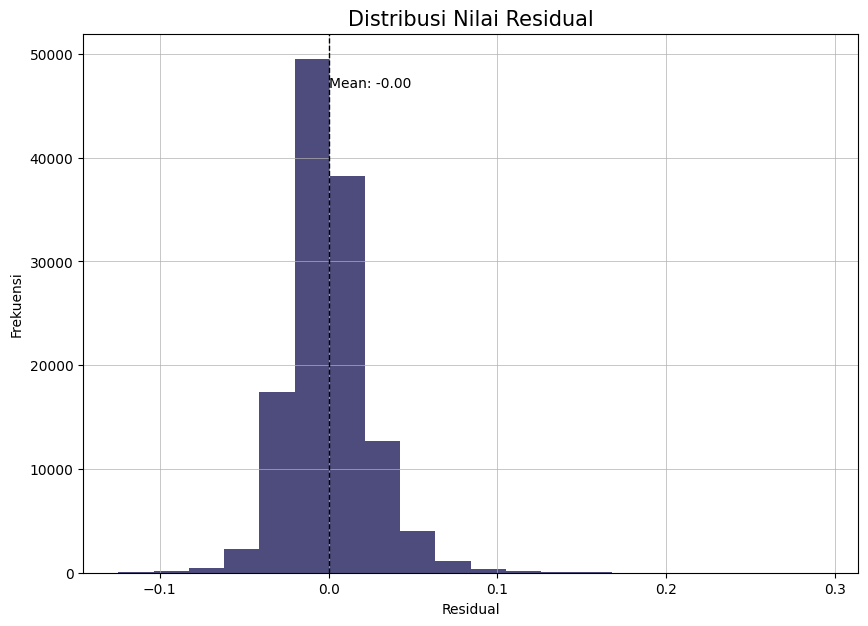

In [ ]:
# plotting
dist_resid = resid["residual"]
dist_resid.plot(kind="hist", figsize=(10,7), bins=20, color="#4D4C7D")
plt.title("Distribusi Nilai Residual", fontsize=15)
plt.xlabel("Residual", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(linewidth=0.5)
plt.axvline(dist_resid.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dist_resid.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dist_resid.mean()))
plt.show()

dari hasil plot di atas, dapat dilihat bahwa nilai residual mdel menyebar di sekitar 0 dengan mean = 0.00 yang berarti residual berdistribusi normal dan memenuhi salah satu asumsi klasik regresi linear. Dapat dikatakan bahwa model regresi yang didapat baik dalam memprediksi nilai variabel dependennya.

In [ ]:
resid['residual'].skew()

0.8823968620890255

Output yang dihasilkan dari fungsi skew() pada kolom 'residual' dari DataFrame 'resid' adalah sebuah nilai numerik sebesar 0.8823968620890255. Nilai skewness yang diperoleh menunjukkan bahwa distribusi data pada kolom 'residual' cenderung memiliki skewness positif namun nilainya sudah mendekati 0, sehingga distribusi data cenderung simetris atau hampir simetris. Hal ini menunjukkan bahwa model mungkin sudah cukup baik dalam melakukan prediksi atau residual pada model sudah cukup kecil. 

# 11.Model Inference

Untuk menguji keakuratan model, dilakukan model inference untuk menguji model dengan data di luar data yang tersedia.
misalkan seseorang ingin melihat berapa prediksi harga taksi yang harus ia keluarkan dengan jarak yang ingin ditempuh sejauh 4km. ia ingin menggunakan taxi UberX sehingga tidak berlaku adanya penggandaan harga dengan visibility 3

In [ ]:
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
visibility = float(input("visibility.1:"))
ride = input("Ride Types:")
types = input("Uber/Lyft?")

val = [distance, surge, visibility]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
                 "UberXL" : 1,
                 "Black" : 2,
                 "BlackSUV": 3,
                 "WAV" : 4,
                 "UberPool" : 5,
                 "Shared" : 6,
                 "Lyft" : 7,
                 "LyftXL" : 8,
                 "Lux": 9,
                 "LuxBlack" : 10,
                 "LuxBlackXL" : 11}

for i in range(0,11):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = model.predict([val])

print("Here's your estimated price:", predict)

Distance:3
Surge Multiplier:1
visibility.1:1
Ride Types:UberX
Uber/Lyft?Uber
[3.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here's your estimated price: [1.17857]


# 12.Pengambilan Kesimpulan
Dari analisis yang telah dikerjakan menggunakan model Linear Regression dapat disimpulkan  :
- dari dataset Rideshare dapat diketahui bahwa perjalanan yang ditempuh menggunakan uber lebih tinggi dibandingkan menggunakan Lyft
- Pada program ini data diolah dengan melakukan data loading, data cleaning, dan melakukan explorasi data analysis. Didalam prosesnya, terdapat 57 columns yang didalamnya terdapat 5 column yang paling berpengaruh dalam model yaitu cab_type, name, distance, price, dan surge_multiplier
- Pada program ini, kami juga menambahkan proses dari data preprocessing yang berfungsi untuk melakukan cek correlation dari beberapa feuture. dan pada data preprocessing ini merupakan tahapan yang mendukung tahap selanjutnya untuk melakukan pemodelan dan melatih data agar lebih akurat.
- dari persamaan yang terbentuk didapatkan nilai r² sebesar 0,9333 dalam presentase 93.33% jadi variabel independenya cukup baik dalam memorediksi variasi nilai dependenya. dan nilai mse sebesar 0.0005676326227626482
nilai rmse sebesar 0.023825041925726976 dan nilai mae sebesar 0.01766172090469554
- residual model dari regresi berdistribusi normal, yang artinya memenuhi salah satu asumsi klasik regresi linear